# Lab5 (PART 1)
Name: Birva Babaria || Rollno: CE010 || ID: 19CEUON064

##### ***Step 1: Import necessary libraries.*** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # for train test splitting
from sklearn.model_selection import train_test_split # for decision tree object
from sklearn.tree import DecisionTreeClassifier # for checking testing results
from sklearn.metrics import classification_report, confusion_matrix # for visualizing tree 
from sklearn.tree import plot_tree

##### ***Step 2: Load Data(stored in local storage of this file).*** 

##### ***Step 3: Digitize the data set using encoding*** 

In [3]:
datasets = pd.read_csv('Dataset1.csv') 
datasets

,Outlook,Temp,Humidity,Wind,Play
0,R,H,Normal,F,N
1,R,H,High,T,N
2,O,H,Normal,F,Y
3,S,M,Normal,F,Y
4,S,C,Normal,F,Y
5,S,C,Low,T,N
6,O,C,Normal,T,Y
7,R,M,Normal,F,N
8,R,C,Low,F,Y
9,S,M,High,F,Y


##### **Digitize the features using encoding**

In [4]:
onehotencoder = OneHotEncoder()

df_encoded = pd.DataFrame()

for col in datasets.columns:
  x1 = onehotencoder.fit_transform(datasets[col].values.reshape(-1,1)).toarray()
  df_encoded = pd.concat([df_encoded, pd.DataFrame(x1)], axis = 1)

df_encoded

,0,1,2,0,1,2,0,1,2,0,1,0,1
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


##### **Separating the target variable(y) and features(X)**

In [5]:
X = df_encoded.iloc[:,0:11]
print(X)

      0    1    2    0    1    2    0    1    2    0    1
0   0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0
1   0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0
2   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0
3   0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0
4   0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
5   0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0
6   1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0
7   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0
8   0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0
9   0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0
10  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0
11  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0
12  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0
13  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0


In [6]:
y = df_encoded.iloc[: , -1:]
print(y)

      1
0   0.0
1   0.0
2   1.0
3   1.0
4   1.0
5   0.0
6   1.0
7   0.0
8   1.0
9   1.0
10  1.0
11  1.0
12  1.0
13  0.0


##### **Digitize the target using encoding**

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)
y

C:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

##### **Splitting the dataset into training and testing sets. Selecting 30% records randomly for testing**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 9)
# random state=student roll_number

##### **Modeling Tree and testing it**

In [9]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

##### **Predicting the values of the test data**

In [10]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



##### **Visualizing the decision tree**

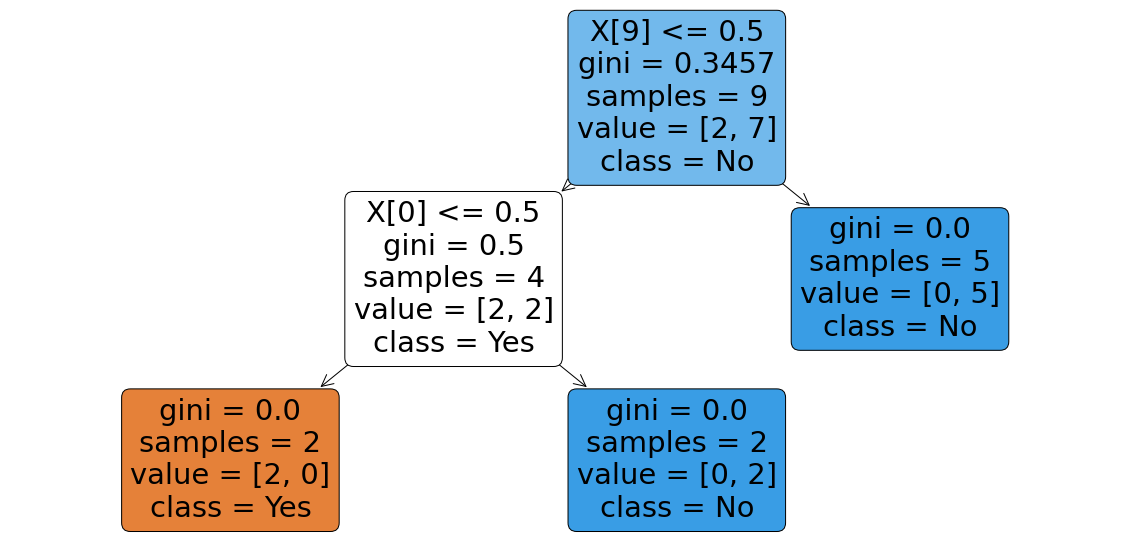

In [11]:
plt.figure(figsize = (20,10))
dec_tree = plot_tree(decision_tree=dtree, 
                     class_names =["Yes", "No"] , filled = True , precision = 4, rounded = True)

##### ***<b><h2>Questions: For Task - 1***

(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

In [12]:
pred_1 = [[0,1,0,0,0,1,0,0,1,1,0]]

dtree.predict(pred_1)

array([1], dtype=int64)

(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

In [13]:
pred_2 = [[0,0,1,1,0,0,0,1,0,0,1]]

dtree.predict(pred_2)

array([0], dtype=int64)

(3) Accuracy, precision and recall of Models?

In [14]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5

